In [246]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from src.estimators import *
from h2o.automl import H2OAutoML
import h2o
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

# DATA VISUALITATION

In [247]:
train_dataset = pd.read_csv('./INPUT/diamonds_train.csv', index_col=0)

In [248]:
train_dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [249]:
test_dataset = pd.read_csv('./INPUT/diamonds_test.csv', index_col=0)

In [250]:
test_dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [251]:
sample = pd.read_csv('./INPUT/sample_submission.csv', index_col=0)

In [252]:
sample.head()

,price
id,
0,12132
1,11786
2,14684
3,15425
4,6724


In [253]:
train_dataset.describe()

,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


In [254]:
train_dataset.isna().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [255]:
train_dataset.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [256]:
#Tenemos varias columnas que los datos son tipo object
train_dataset.cut.value_counts()

Ideal        16090
Premium      10339
Very Good     9036
Good          3694
Fair          1186
Name: cut, dtype: int64

In [257]:
train_dataset.color.value_counts()

G    8499
E    7351
F    7130
H    6234
D    5074
I    4023
J    2034
Name: color, dtype: int64

In [258]:
train_dataset.clarity.value_counts()

SI1     9751
VS2     9178
SI2     6828
VS1     6101
VVS2    3858
VVS1    2714
IF      1362
I1       553
Name: clarity, dtype: int64

In [259]:
#Transformo datos categoricos a numericos
columns =["cut","color","clarity"]
for e in columns:
    le = preprocessing.LabelEncoder()
    le.fit(train_dataset[e])
    train_dataset[e]=le.transform(train_dataset[e])
    test_dataset[e]=le.transform(test_dataset[e])

In [260]:
train_dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,2,4,5,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,4,0,7,64.0,56.0,4.14,4.17,2.66,532
2,0.42,3,2,4,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,2,4,1,61.1,57.0,4.16,4.12,2.53,600
4,1.10,1,3,2,63.4,57.0,6.52,6.55,4.14,4997


In [261]:
test_dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2,4,3,60.0,56.0,4.41,4.43,2.65
1,0.34,2,0,1,62.1,57.0,4.52,4.46,2.79
2,1.57,4,5,5,60.3,58.0,7.58,7.55,4.56
3,0.31,2,4,5,61.8,57.0,4.32,4.36,2.68
4,1.51,1,5,6,64.0,60.0,7.26,7.21,4.63


In [262]:
train_dataset.corr()>0.8

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,True,False,False,False,False,False,True,True,True,True
cut,False,True,False,False,False,False,False,False,False,False
color,False,False,True,False,False,False,False,False,False,False
clarity,False,False,False,True,False,False,False,False,False,False
depth,False,False,False,False,True,False,False,False,False,False
table,False,False,False,False,False,True,False,False,False,False
x,True,False,False,False,False,False,True,True,True,True
y,True,False,False,False,False,False,True,True,True,True
z,True,False,False,False,False,False,True,True,True,True
price,True,False,False,False,False,False,True,True,True,True


In [263]:
#Hay fuerte correlacion entre el tamaño y el peso.
#probare eliminando x,z,carat, Me quedo con y por ser la que menor corr tiene con price
test_dataset = test_dataset.drop(columns=["carat","x","z"])
train_dataset = train_dataset.drop(columns=["carat","x","z"])
train_dataset.head(1)

,cut,color,clarity,depth,table,y,price
0,2,4,5,63.0,57.0,6.7,6134


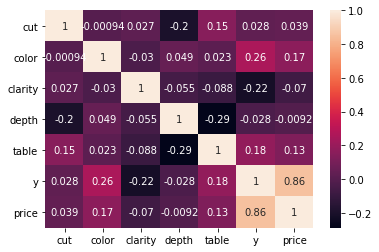

In [264]:
sns.heatmap(train_dataset.corr(),annot=True)

In [265]:
#Features
X = train_dataset.drop(columns=["price"])
#GroundTruth
y = train_dataset["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### HistGradientBoostingRegressor

In [121]:
Hist=HistGradientBoostingR(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:    6.5s finished
/home/maria/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:821: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Train complete


In [122]:
y_predictHist=printResult(Hist,test_dataset,X_test,y_test)

	 rsme: 299148.833
      r2score: 0.9812237906981642


In [123]:
Hist.best_estimator_

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

In [124]:
Hist.best_params_

{'learning_rate': 0.1, 'loss': 'least_squares'}

In [125]:
Hist.best_score_

-362515.96572780906

In [134]:
submission= pd.DataFrame({"price": y_predictHist})
submission.index.name = "id"
submission.to_csv("./OUTPUT/hist.csv")

### DecisionTreeRegressor

In [22]:
dtree=DecisionTreeR(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.0s


Train complete


[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed:  1.4min finished
/home/maria/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:821: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [23]:
y_predictdt=printResult(dtree,test_dataset,X_test,y_test)

	 rsme: 648488.756
      r2score: 0.9586950351109729


In [24]:
dtree.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [25]:
dtree.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'random_state': 0,
 'splitter': 'best'}

In [26]:
dtree.best_score_

-714123.794207914

In [27]:
submission1= pd.DataFrame({"price": y_predictdt})
submission1.index.name = "id"
submission1.to_csv("./OUTPUT/DecisionTree.csv")

### RandomForestRegressor

In [ ]:
rF=RamdomForestR(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
y_predictrF=printResult(rF,test_dataset,X_test,y_test)

In [ ]:
rF.best_estimator_ 

In [ ]:
rF.best_params_

In [ ]:
rF.best_score_

In [28]:
submission2= pd.DataFrame({"price": y_predictrF})
submission2.index.name = "id"
submission2.to_csv("./OUTPUT/RandomForest.csv")

### GradientBoostingRegressor

In [40]:
gb =GradientBoostingR(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   40.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:  6.9min finished
/home/maria/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:821: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Train complete


In [41]:
gb.best_estimator_ 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=1750,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=1, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
gb.best_params_

{'learning_rate': 0.05,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 1750}

In [43]:
gb.best_score_

-371499.88228694675

In [44]:
y_predictgb=printResult(gb,test_dataset,X_test,y_test)

	 rsme: 365376.08
      r2score: 0.9766642204138182


In [32]:
submission3= pd.DataFrame({"price": y_predictgb})
submission3.index.name = "id"
submission3.to_csv("./OUTPUT/GradientB.csv")

### KNeighborsRegressor

In [26]:
kN =KNeighborsR(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   24.8s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:   51.8s finished
/home/maria/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:821: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Train complete


In [27]:
y_predictKN=printResult(kN,test_dataset,X_test,y_test)

	 rsme: 1548948.478
      r2score: 0.9016002419155986


In [28]:
kN.best_estimator_

KNeighborsRegressor(algorithm='brute', leaf_size=50, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [29]:
kN.best_params_

{'algorithm': 'brute', 'leaf_size': 50, 'n_neighbors': 5, 'p': 2}

In [30]:
kN.best_score_

-1616145.5953322803

In [37]:
submission4= pd.DataFrame({"price": y_predictKN})
submission4.index.name = "id"
submission4.to_csv("./OUTPUT/kNeighbors.csv")

In [38]:
submission4.columns

Index(['price'], dtype='object')

### h2o - AutoML

In [242]:
h2o.init(max_mem_size = 2)            #uses all cores by default
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_252"; OpenJDK Runtime Environment (build 1.8.0_252-8u252-b09-1ubuntu1-b09); OpenJDK 64-Bit Server VM (build 25.252-b09, mixed mode)
  Starting server from /home/maria/.local/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5_vxv6lx
  JVM stdout: /tmp/tmp5_vxv6lx/h2o_maria_started_from_python.out
  JVM stderr: /tmp/tmp5_vxv6lx/h2o_maria_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_maria_jy9tyi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.778 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [243]:
train_dataset = h2o.import_file('./INPUT/diamonds_train.csv')
test_dataset = h2o.import_file('./INPUT/diamonds_test.csv')
train_dataset_df=train_dataset.as_data_frame(use_pandas=True)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [194]:
train, valid, test = train_dataset.split_frame([0.6, 0.2], seed = 1234)
X = train_dataset.col_names[1: -1]
y = train_dataset.col_names[-1]

In [195]:
aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(X, y, training_frame = train, validation_frame = valid)

AutoML progress: |
19:45:32.871: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


In [196]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200511_194532,288958,537.548,288958,275.589,0.098594
StackedEnsemble_BestOfFamily_AutoML_20200511_194532,296023,544.08,296023,279.19,0.099656
GBM_3_AutoML_20200511_194532,305621,552.83,305621,295.552,0.117332
GBM_1_AutoML_20200511_194532,305670,552.875,305670,291.597,0.109949
GBM_2_AutoML_20200511_194532,306869,553.958,306869,293.76,0.11344
GBM_4_AutoML_20200511_194532,348716,590.522,348716,348.542,0.169813
XGBoost_2_AutoML_20200511_194532,389352,623.981,389352,322.412,0.10615
XGBoost_3_AutoML_20200511_194532,404862,636.288,404862,351.12,0.133916
DRF_1_AutoML_20200511_194532,429031,655.005,429031,337.461,0.115107
XGBoost_1_AutoML_20200511_194532,467546,683.773,467546,364.06,0.119675


In [197]:
pred = aml.predict(test_dataset)
len(pred)

stackedensemble prediction progress: |████████████████████████████████████| 100%


13449

In [198]:
pred

predict
432.176
1305.94
9881.38
530.781
10195.6
2315.92
1105.59
10323.1
877.387
504.953


In [199]:
submissionH2o = pred.as_data_frame()

In [200]:
submissionH2o.columns=['price']

In [201]:
submissionH2o= pd.DataFrame({"price": submissionH2o["price"]})
submissionH2o.index.name = "id"

In [202]:
submissionH2o

,price
id,
0,432.176432
1,1305.937144
2,9881.375984
3,530.780537
4,10195.604190
...,...
13444,4999.293046
13445,457.158877
13446,14730.038854


In [203]:
submissionH2o.to_csv("./OUTPUT/h2o.csv")

In [211]:
h2o.shutdown(prompt = True)

<ipython-input-211-1ea49f0103fa>:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt = True)
